In [5]:
import xarray as xr
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!pip install xarray rioxarray geopandas matplotlib cartopy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.



  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached xarray-2025.3.1-py3-none-any.whl.metadata (12 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached rioxarray-0.19.0-py3-none-any.whl (62 kB)
Using cached xarray-2025.3.1-py3-none-any.whl (1.3 MB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 10.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/11.0 MB 11.9 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.0 MB 12.1 MB/s eta

In [6]:
df = xr.open_dataset("C:/Users/windows11/geog-312/50_Days_coding/drought/bt/Brightness_temp_82_14_hemisphere.nc")

In [33]:
ndvi = xr.open_dataset("C:/Users/windows11/geog-312/50_Days_coding/drought/Global_GIMMS_NDVI3g/NDVI_global_82_14_hemisphere_annual.nc")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\windows11\anaconda3\Lib\site-packages\xarray\coding\times.py", line 289, in decode_cf_datetime
    def _unpack_time_unit_and_ref_date(
                        ^^^^^^^^^^^^^^^^
  File "C:\Users\windows11\anaconda3\Lib\site-packages\xarray\coding\times.py", line 226, in _decode_datetime_with_pandas
    date_sep: str = r"\-",
            ^^^^^^^^^^^^^^^
  File "C:\Users\windows11\anaconda3\Lib\site-packages\xarray\coding\times.py", line 114, in _netcdf_to_numpy_timeunit
    convert_time_or_go_back(tmin, pd.Timestamp)
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyError: 'months'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\windows11\anaconda3\Lib\site-packages\xarray\coding\times.py", line 186, in _decode_cf_datetime_dtype
    "assumed to be the year hence will be padded with zeros to remove "
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [7]:
df

<xarray.Dataset>
Dimensions:  (time: 231, lon: 144, lat: 58)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31T18:00:00 ... 2014-12-31T18:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -58.75 -56.25 -53.75 -51.25 ... 78.75 81.25 83.75
Data variables:
    btmp     (time, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 2.0.4 (https://mpimet.mpg....
    Conventions:    None
    creation_date:  Tue May 24 02:55:13 MDT 2022
    NCL_Version:    6.6.2
    system:         Linux casper34 3.10.0-1127.18.2.el7.x86_64 #1 SMP Sun Jul...
    grib_source:    fcst_surf.118_brtmp.reg_tl319.195801_195812.grb
    title:          NCL: convert-GRIB-to-netCDF
    history:        Tue May 09 12:32:26 2023: cdo -addc,-273.15 -add -setclon...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....
    CDO:            Climate Data Operators version 2.0.4 (https://mpimet.mpg....

In [10]:
df ["time"]

<xarray.DataArray 'time' (time: 231)>
array(['1982-01-31T18:00:00.000000000', '1982-02-28T18:00:00.000000000',
       '1982-03-31T18:00:00.000000000', ..., '2014-10-31T18:00:00.000000000',
       '2014-11-30T18:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31T18:00:00 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      initial time
    axis:           T

In [12]:
df.data_vars

Data variables:
    btmp     (time, lat, lon) float32 ...

In [13]:
df.info()

xarray.Dataset {
dimensions:
	time = 231 ;
	lon = 144 ;
	lat = 58 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = initial time ;
		time:axis = T ;
	float64 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
	float64 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
	float32 btmp(time, lat, lon) ;
		btmp:long_name = Brightness temperature ;
		btmp:units = K ;
		btmp:N = [124 112 124 120 124 120 124 124 120 124 120 124] ;
		btmp:statistical_process_duration = 6 hours (at intervals of 6 hours) ;
		btmp:statistical_process_descriptor = average of N forecasts (or initialized analyses) ;
		btmp:forecast_time_units = hours ;
		btmp:forecast_time = 0 ;
		btmp:parameter_number = 118 ;
		btmp:parameter_table_version = 200 ;
		btmp:gds_grid_type = 4 ;
		btmp:level_indicator = 1 ;
		btmp:center = Japanese Meteorologi

In [15]:
btmp = df['btmp']

In [16]:
print(btmp)

<xarray.DataArray 'btmp' (time: 231, lat: 58, lon: 144)>
[1929312 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31T18:00:00 ... 2014-12-31T18:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -58.75 -56.25 -53.75 -51.25 ... 78.75 81.25 83.75
Attributes: (12/13)
    long_name:                       Brightness temperature
    units:                           K
    N:                               [124 112 124 120 124 120 124 124 120 124...
    statistical_process_duration:    6 hours (at intervals of 6 hours)
    statistical_process_descriptor:  average of N forecasts (or initialized a...
    forecast_time_units:             hours
    ...                              ...
    parameter_number:                118
    parameter_table_version:         200
    gds_grid_type:                   4
    level_indicator:                 1
    center:                          Japanese Meteorological Agen

In [17]:
btmp = btmp.rio.write_crs("EPSG:4326")

In [18]:
print(btmp)

<xarray.DataArray 'btmp' (time: 231, lat: 58, lon: 144)>
[1929312 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 1982-01-31T18:00:00 ... 2014-12-31T18:...
  * lon          (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat          (lat) float64 -58.75 -56.25 -53.75 -51.25 ... 78.75 81.25 83.75
    spatial_ref  int32 0
Attributes: (12/13)
    long_name:                       Brightness temperature
    units:                           K
    N:                               [124 112 124 120 124 120 124 124 120 124...
    statistical_process_duration:    6 hours (at intervals of 6 hours)
    statistical_process_descriptor:  average of N forecasts (or initialized a...
    forecast_time_units:             hours
    ...                              ...
    parameter_number:                118
    parameter_table_version:         200
    gds_grid_type:                   4
    level_indicator:                 1
    center:                   

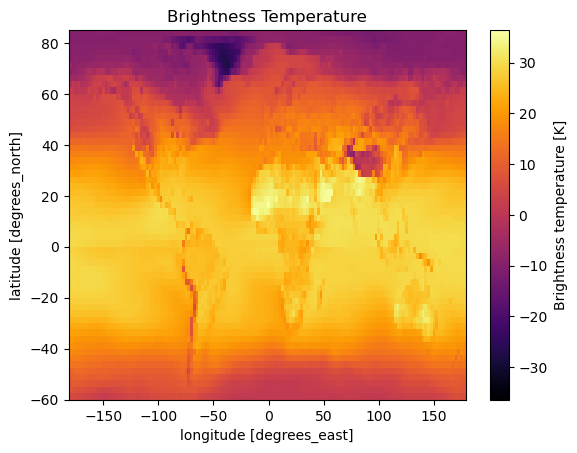

In [25]:
btmp.isel(time=0).plot(cmap='inferno')
plt.title("Brightness Temperature")
plt.show()

In [26]:
plateau = gpd.read_file("C:/Users/windows11/geog-312/50_Days_coding/Shp_plateau")

In [30]:
btmp_clipped = btmp.rio.clip(plateau.geometry, plateau.crs, drop=True)

ImportError: cannot import name '_coordinates_from_variable' from 'xarray.core.coordinates' (C:\Users\windows11\anaconda3\Lib\site-packages\xarray\core\coordinates.py)

In [29]:
!pip install --upgrade xarray rioxarray

In [31]:
btmp_clipped.isel(time=0).plot(cmap='inferno')
plt.title("Brightness Temperature over Plateau State - First Time Step")
plt.show()

NameError: name 'btmp_clipped' is not defined